In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score 

In [ ]:
!pip install scikit-plot 


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import scikitplot as skplt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer
from sklearn.metrics import roc_curve

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Load Dataset

In [ ]:
data=pd.read_csv(r'/content/drive/MyDrive/Data240/Final/Code/processed_drug_dataset.csv')
data.columns.values

array(['ID', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity',
       'Neuroticism', 'Extraversion', 'Openness', 'Agreeableness',
       'Conscientiousness', 'Impulsiveness', 'Sensation_seeking',
       'Alcohol', 'Amphetamine', 'Amyl_nitrite', 'Benzodiazepine',
       'Caffeine', 'Cannabis', 'Chocolate', 'Cocaine', 'Crack', 'Ecstasy',
       'Heroin', 'Ketamine', 'Legal_highs', 'LSD', 'Methadone',
       'Mushrooms', 'Nicotine', 'Semeron', 'VSA'], dtype=object)

In [ ]:
def drug_trainsplit(df,drug):
  data1=df.copy()
  X=data1.drop(columns=drug)
  y=data1[drug]
  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=69,stratify=y)
  sc=StandardScaler()
  X_train=sc.fit_transform(X_train)
  X_test=sc.fit_transform(X_test)
  return X_train,X_test,y_train,y_test

def drug_accuracy(y_t,y_p):
  cm = pd.DataFrame(confusion_matrix(y_test, y_pred), index=['True[0]','True[1]'],
                columns=['Predict[0]','Predict[1]'])
  ac = accuracy_score(y_t,y_p)
  print(cm)
  print(f'Accuracy score is {ac}')
  print(classification_report(y_test,y_pred))

### Using all features except output (Cannabis)

In [ ]:
X_train,X_test,y_train,y_test=drug_trainsplit(data,'Cannabis')

classifier=GaussianNB()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

drug_accuracy(y_test,y_pred)



         Predict[0]  Predict[1]
True[0]           0         177
True[1]           0         200
Accuracy score is 0.5305039787798409
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       177
           1       0.53      1.00      0.69       200

    accuracy                           0.53       377
   macro avg       0.27      0.50      0.35       377
weighted avg       0.28      0.53      0.37       377



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
X_train

array([[ 1.57919889,  1.29900104, -1.00332337, ..., -1.14979733,
        -0.03645413, -0.23988301],
       [-0.19749919, -1.05387705,  0.99668764, ...,  0.86971849,
        -0.03645413, -0.23988301],
       [ 1.05937082, -1.05387705, -1.00332337, ...,  0.86971849,
        -0.03645413, -0.23988301],
       ...,
       [ 1.59033806, -1.05387705, -1.00332337, ...,  0.86971849,
        -0.03645413, -0.23988301],
       [-0.11952498, -0.26958435, -1.00332337, ..., -1.14979733,
        -0.03645413, -0.23988301],
       [ 1.66459922, -0.26958435,  0.99668764, ..., -1.14979733,
        -0.03645413, -0.23988301]])

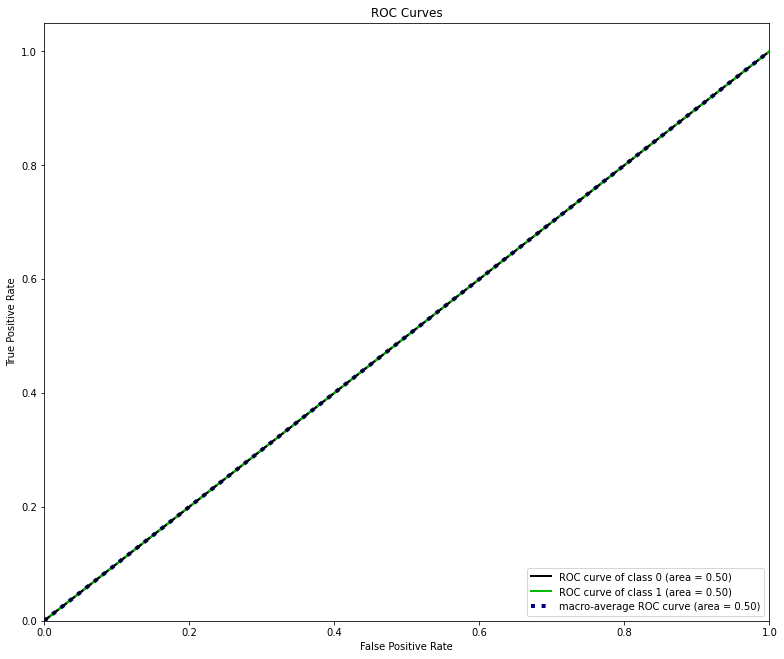

In [ ]:
skplt.metrics.plot_roc(y_test,classifier.predict_proba(X_test),plot_micro=False, figsize=(13,11))
plt.show()

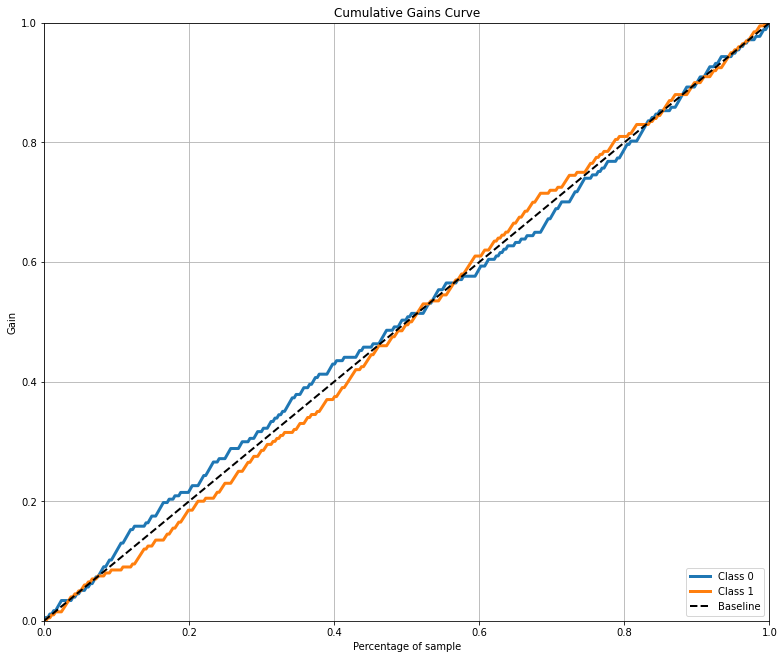

In [ ]:
skplt.metrics.plot_cumulative_gain(y_test,classifier.predict_proba(X_test), figsize=(13,11))
plt.show()

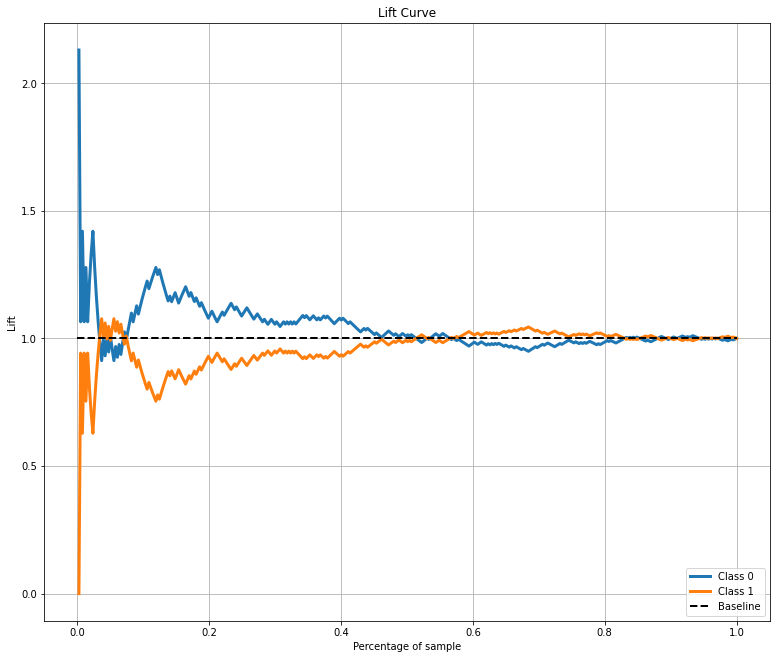

In [ ]:
skplt.metrics.plot_lift_curve(y_test,classifier.predict_proba(X_test),figsize=(13,11))
plt.show()

### Using Age





In [ ]:
X_train,X_test,y_train,y_test=drug_trainsplit(data[['Age',"Gender", 'Cannabis']],
                                              'Cannabis')

In [ ]:
classifier=GaussianNB()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

drug_accuracy(y_test,y_pred)

         Predict[0]  Predict[1]
True[0]         124          53
True[1]          55         145
Accuracy score is 0.713527851458886
              precision    recall  f1-score   support

           0       0.69      0.70      0.70       177
           1       0.73      0.72      0.73       200

    accuracy                           0.71       377
   macro avg       0.71      0.71      0.71       377
weighted avg       0.71      0.71      0.71       377



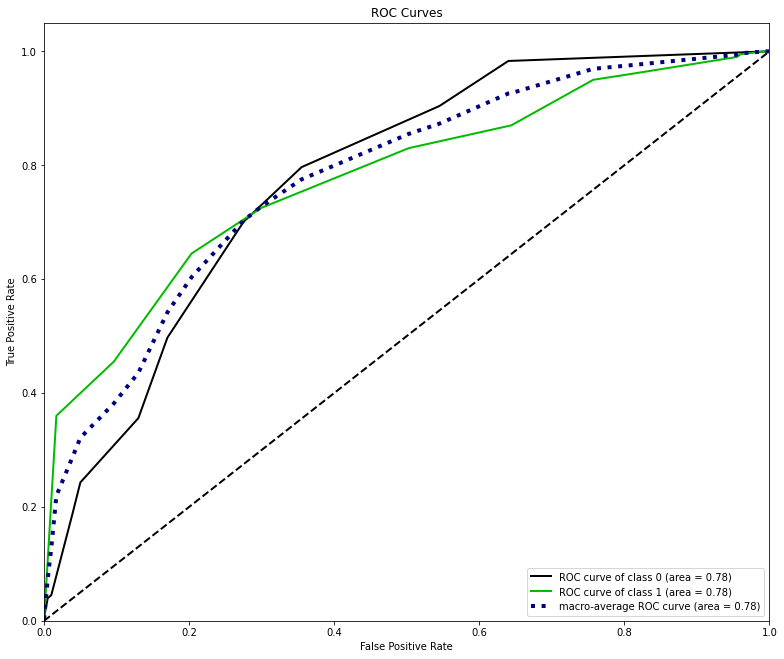

In [ ]:
skplt.metrics.plot_roc(y_test,classifier.predict_proba(X_test),plot_micro=False, figsize=(13,11))
plt.show()

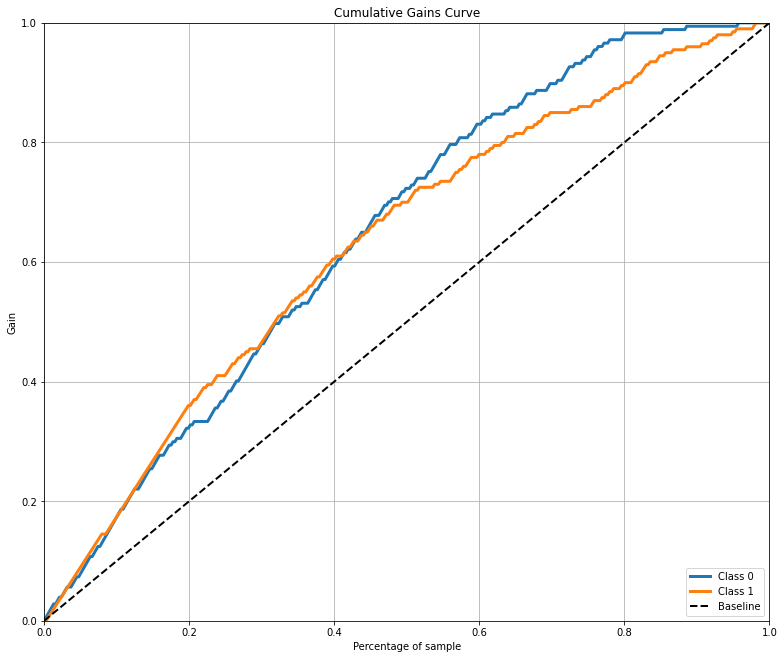

In [ ]:
skplt.metrics.plot_cumulative_gain(y_test,classifier.predict_proba(X_test), figsize=(13,11))
plt.show()

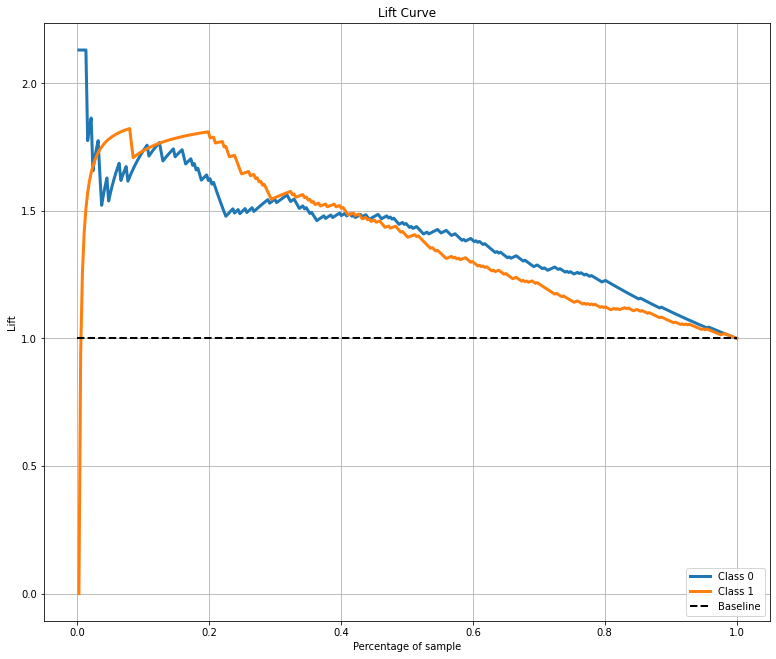

In [ ]:
skplt.metrics.plot_lift_curve(y_test,classifier.predict_proba(X_test),figsize=(13,11))
plt.show()

### Using 'Age', 'Gender', 'Education', 'Extraversion',         'Openness', 'Conscientiousness', 'Sensation_seeking', 'Ecstasy',          'Legal_highs', 'Mushrooms', 'Nicotine'

In [ ]:
#X_train,X_test,y_train,y_test=drug_trainsplit(data[['Age', 'Gender', 'Education',  'Extraversion','Openness', 'Conscientiousness', 'Sensation_seeking','Ecstasy', 'Legal_highs', 'Mushrooms', 'Nicotine','Cannabis']],
#                                              'Cannabis')

X_train,X_test,y_train,y_test=drug_trainsplit(data[['Age', 'Gender','Education','Extraversion','Openness', 'Conscientiousness', 'Sensation_seeking', 'Ecstasy', 'Legal_highs', 'Mushrooms', 'Nicotine','Cannabis']],
                                              'Cannabis')

In [ ]:


classifier=GaussianNB()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

drug_accuracy(y_test,y_pred)

         Predict[0]  Predict[1]
True[0]         163          14
True[1]          52         148
Accuracy score is 0.8249336870026526
              precision    recall  f1-score   support

           0       0.76      0.92      0.83       177
           1       0.91      0.74      0.82       200

    accuracy                           0.82       377
   macro avg       0.84      0.83      0.82       377
weighted avg       0.84      0.82      0.82       377



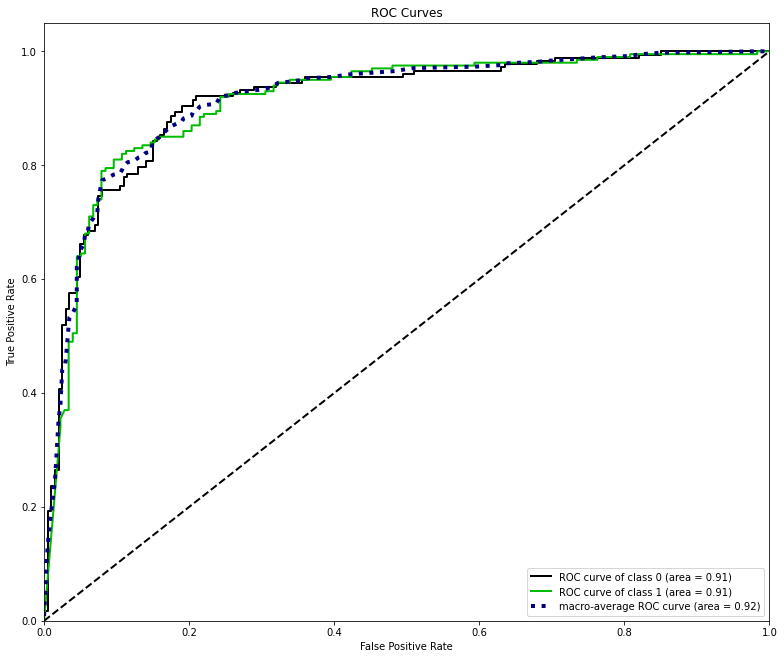

In [ ]:
skplt.metrics.plot_roc(y_test,classifier.predict_proba(X_test),plot_micro=False, figsize=(13,11))
plt.show()

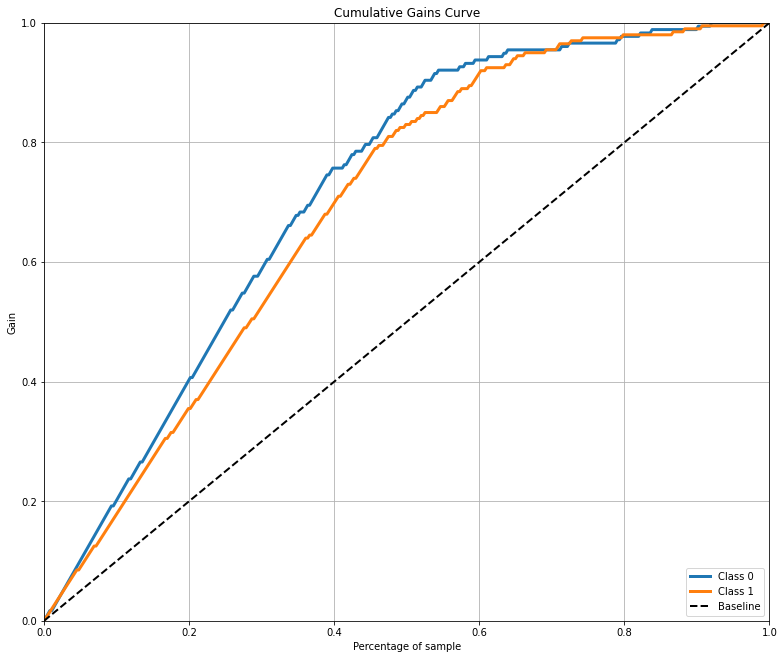

In [ ]:
skplt.metrics.plot_cumulative_gain(y_test,classifier.predict_proba(X_test), figsize=(13,11))
plt.show()

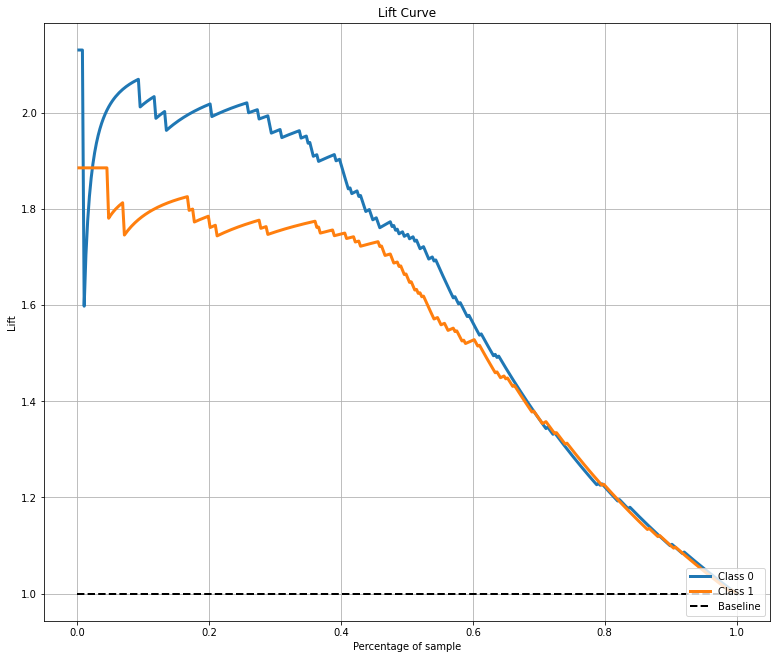

In [ ]:
skplt.metrics.plot_lift_curve(y_test,classifier.predict_proba(X_test),figsize=(13,11))
plt.show()

In [ ]:
X_train

array([[ 1.29900104, -1.00332337,  0.57162366, ..., -0.6607619 ,
        -0.53976414, -1.14979733],
       [-1.05387705,  0.99668764,  0.0082248 , ..., -0.6607619 ,
        -0.53976414,  0.86971849],
       [-1.05387705, -1.00332337,  0.57162366, ..., -0.6607619 ,
        -0.53976414,  0.86971849],
       ...,
       [-1.05387705, -1.00332337, -0.55517405, ..., -0.6607619 ,
        -0.53976414,  0.86971849],
       [-0.26958435, -1.00332337,  1.13502251, ..., -0.6607619 ,
        -0.53976414, -1.14979733],
       [-0.26958435,  0.99668764, -0.55517405, ..., -0.6607619 ,
        -0.53976414, -1.14979733]])